## Let's Grow More (LGMVIP)- Data Science Intern

### Author- Nikita Kolte

### Task 2: Exploratory Data Analysis on dataset Terrorism

As a security/defense analyst, try to find out the hot zone of terrorism.

### Dataset link:https://bit.ly/2TK5Xn5

#### Importing Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df=pd.read_csv("C:\\Users\\Ankita\\Downloads\\globalterrorismdb_0718dist.csv")

C:\Users\Ankita\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [103]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [104]:
# Checking Missing values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [105]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [106]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [107]:
#considering reqd. columns only
df=df[['eventid', 'iyear', 'imonth', 'country', 'region','provstate','city','crit1', 'crit2', 'crit3','success', 'suicide', 'attacktype1','targtype1','natlty1','gname','guncertain1','claimed','weaptype1','nkill','nwound']]
df.head()

,eventid,iyear,imonth,country,region,provstate,city,crit1,crit2,crit3,...,suicide,attacktype1,targtype1,natlty1,gname,guncertain1,claimed,weaptype1,nkill,nwound
0,197000000001,1970,7,58,2,NaN,Santo Domingo,1,1,1,...,0,1,14,58.0,MANO-D,0.0,NaN,13,1.0,0.0
1,197000000002,1970,0,130,1,Federal,Mexico city,1,1,1,...,0,6,7,21.0,23rd of September Communist League,0.0,NaN,13,0.0,0.0
2,197001000001,1970,1,160,5,Tarlac,Unknown,1,1,1,...,0,1,10,217.0,Unknown,0.0,NaN,13,1.0,0.0
3,197001000002,1970,1,78,8,Attica,Athens,1,1,1,...,0,3,7,217.0,Unknown,0.0,NaN,6,NaN,NaN
4,197001000003,1970,1,101,4,Fukouka,Fukouka,1,1,1,...,0,7,7,217.0,Unknown,0.0,NaN,8,NaN,NaN


In [108]:
df.isnull().any()

eventid        False
iyear          False
imonth         False
country        False
region         False
provstate       True
city            True
crit1          False
crit2          False
crit3          False
success        False
suicide        False
attacktype1    False
targtype1      False
natlty1         True
gname          False
guncertain1     True
claimed         True
weaptype1      False
nkill           True
nwound          True
dtype: bool

In [109]:
df=df.dropna()

In [110]:
df.isnull().any()

eventid        False
iyear          False
imonth         False
country        False
region         False
provstate      False
city           False
crit1          False
crit2          False
crit3          False
success        False
suicide        False
attacktype1    False
targtype1      False
natlty1        False
gname          False
guncertain1    False
claimed        False
weaptype1      False
nkill          False
nwound         False
dtype: bool

Now our dataset has no missing value and is ready for analysis.

In [111]:
df.describe()

,eventid,iyear,imonth,country,region,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,natlty1,guncertain1,claimed,weaptype1,nkill,nwound
count,1.050730e+05,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000
mean,2.011576e+11,2011.509750,6.469712,124.716292,7.863542,0.988951,0.995746,0.886184,0.870471,0.056218,3.272401,8.624109,126.954403,0.106811,0.057598,6.308452,2.145699,3.802804
std,5.959570e+08,5.959394,3.383224,96.699951,2.460104,0.104535,0.065086,0.317589,0.335786,0.230343,1.804304,6.522664,93.529263,0.308875,1.052135,1.914574,9.820571,40.633761
min,1.970010e+11,1970.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,-9.000000,1.000000,0.000000,0.000000
25%,2.010011e+11,2010.000000,4.000000,92.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,92.000000,0.000000,0.000000,5.000000,0.000000,0.000000
50%,2.013102e+11,2013.000000,6.000000,95.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,97.000000,0.000000,0.000000,6.000000,1.000000,0.000000
75%,2.015083e+11,2015.000000,9.000000,160.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,14.000000,160.000000,0.000000,0.000000,6.000000,2.000000,3.000000
max,2.017123e+11,2017.000000,12.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1004.000000,1.000000,1.000000,13.000000,1384.000000,8191.000000


## Visualization

### Number of terrorism attacks by attack type

In [112]:
# attack types we have
df['attacktype1'].value_counts()

3    57011
2    24546
1     6979
7     6029
6     5554
9     3736
8      591
5      350
4      277
Name: attacktype1, dtype: int64

Text(0.5, 1.0, 'No.of attacks per type')

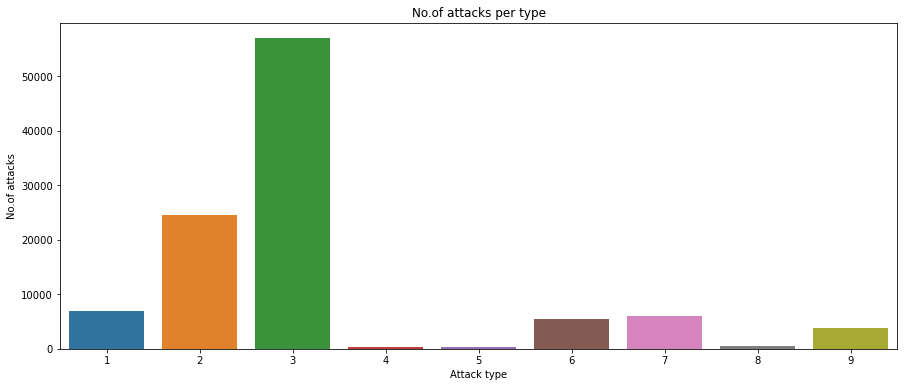

In [113]:
plt.subplots(figsize=(15,6))
sns.countplot(x='attacktype1',data=df)
plt.xlabel('Attack type')
plt.ylabel('No.of attacks')
plt.title('No.of attacks per type')

### Terrorism attacks over years

Text(0.5, 1.0, 'terrorism attacks over years')

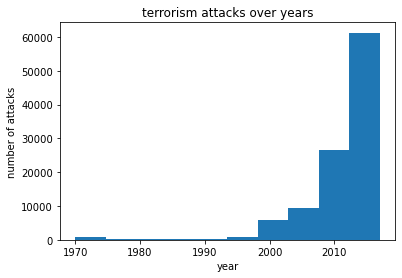

In [114]:
df['iyear'].plot.hist() 
plt.xlabel('year')
plt.ylabel('number of attacks')
plt.title('terrorism attacks over years')

### Number of success and failure status of terrorism attacks

In [115]:
df['success'].value_counts()

1    91463
0    13610
Name: success, dtype: int64

Text(0.5, 1.0, 'No. of success and failure of terrorism attacks')

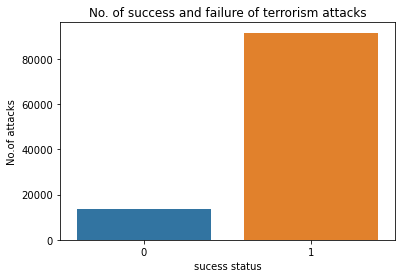

In [116]:
sns.countplot(x='success',data=df)
plt.xlabel('sucess status')
plt.ylabel('No.of attacks')
plt.title('No. of success and failure of terrorism attacks')

### Top 5 cities with highest terrorism attacks

In [117]:
df['city'].value_counts().nlargest(5)

Baghdad      7333
Unknown      4264
Mosul        2110
Karachi      1535
Mogadishu    1261
Name: city, dtype: int64

<AxesSubplot:>

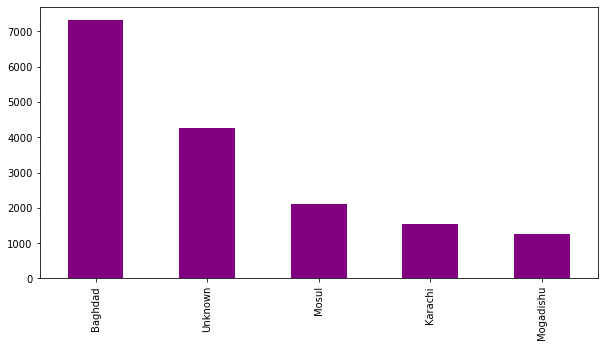

In [118]:
df['city'].value_counts().nlargest(5).plot(kind='bar', figsize=(10,5),color=['purple'])

## Conclusion

The insights gathered from the dataset includes:
Number of terrorism attacks were increases rapidly after 2010.
Out of total terrorism attacks very few attacks were failed and almost all the terrorism attacks succeded.
Top five cities with highest number of attacks are Baghdad,Karachi,Lima and Mosul. Compare to all the other countries number of terrorist attacks in Baghdad is very high. 